In [1]:
%matplotlib inline
import yt
from galaxy_analysis.analysis import Galaxy
from galaxy_analysis.yt_fields import field_generators as fg
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#
#
#

dsname = 'DD0088'
wdir   = '~/work/enzo_runs/Wise12/Nested-Test-L2'

#gal = Galaxy(dsname, wdir = wdir)


In [3]:

ds = yt.load(wdir + '/' + dsname + '/' + dsname)
data = ds.all_data()
print(ds.domain_width.to('kpc'))


fg.generate_derived_fields(ds)

ds = yt.load(wdir + '/' + dsname + '/' + dsname)
data = ds.all_data()

fg.generate_particle_filters(ds)


[102.51652059 102.51652059 102.51652059] kpc


Parsing Hierarchy : 100%|██████████| 1638/1638 [00:00<00:00, 11002.98it/s]
/home/aemerick/.local/lib/python3.7/site-packages/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


tracer species present:  ['C', 'N', 'O', 'Na', 'Mg', 'Si', 'S', 'Ca', 'Mn', 'Fe', 'Ni', 'As', 'Sr', 'Y', 'Ba']
16 mass fields defined
16 mass fraction fields defined
15 number density fields defined
141 abundance ratio fields defined
5 additional helper fields defined


Parsing Hierarchy : 100%|██████████| 1638/1638 [00:00<00:00, 10476.65it/s]
/home/aemerick/code/onezone/onezone/data_tables.py:98: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if  c == flag or id == flag:


In [78]:
ds.print_stats()
ds.current_time.to('Myr')

level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	    64	        262144	            64
  1	    16	        195112	            58
  2	    41	        512000	            80
  3	   199	       1319752	           110
  4	   373	       1085016	           103
  5	   324	        503704	            80
  6	   174	        153352	            54
  7	    33	         19896	            28
  8	     1	           216	             6
----------------------------------------------
   	  1225	       4051192


t = 1.95089178e+01 = 1.32238181e+16 s = 4.19037509e+08 years

Smallest Cell:
	Width: 5.014e-06 Mpc
	Width: 5.014e+00 pc
	Width: 1.034e+06 AU
	Width: 1.547e+19 cm


419.03750890206084 Myr

In [50]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'birth_mass'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_

In [ ]:
#if np.size(px)==0:: # main sequnce stars
select = data['particle_type'] == 11
px = data['particle_position_x'][select]
py = data['particle_position_y'][select]
pz = data['particle_position_z'][select]

print("number of main sequnce stars ", np.size(px))

if np.size(px)==0: # unresolved stars
    select = data['particle_type'] == 14
    px = data['particle_position_x'][select]
    py = data['particle_position_y'][select]
    pz = data['particle_position_z'][select]
    
    if np.size(px) > 0:
        print("using MS popIII stars")        
else:
    print("using main sequnce stars")
    
print("number of MS popIII stars ", np.size(data['birth_mass'][ data['particle_type'] == 14]))


if np.size(px)==0: # unresolved stars
    select = data['particle_type'] == 15
    px = data['particle_position_x'][select]
    py = data['particle_position_y'][select]
    pz = data['particle_position_z'][select]
    
    if np.size(px) > 0:
        print("using unresolved stars")
        

if np.size(px)==0: # remnants
    select = data['particle_type'] == 13
    px = data['particle_position_x'][select]
    py = data['particle_position_y'][select]
    pz = data['particle_position_z'][select]
    
    if np.size(px) > 0:
    
        print("using remnants")

if np.size(px) == 0: # else, max density
    center = 'max'
    print("using max density")
else:
    center = [px[0],py[0],pz[0]]    


center = ds.domain_center.value



#
#
#
select = (data['birth_mass'] > 3.0) * (data['birth_mass'] < 8.0) * (data['particle_type'] == 13)

print("Number of AGB events: ",np.size(data['birth_mass'][select]))
select = (data['birth_mass'] > 2.0) * (data['birth_mass'] < 8.0) * (data['particle_type'] == 11)

print("Number of stars that will have AGB events : ",np.size(data['birth_mass'][select]))
t_life = data['dynamical_time'].to('Myr')[select]
t_birth = data['creation_time'].to('Myr')[select]

death = t_life + t_birth

time_to_death = (death - ds.current_time)
print("First will occur in : ", np.min(time_to_death), np.min(time_to_death[time_to_death>0]),"Myr")

/home/aemerick/.local/lib/python3.7/site-packages/yt/data_objects/construction_data_containers.py:379: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(nvals, nwvals[:,None], nvals)



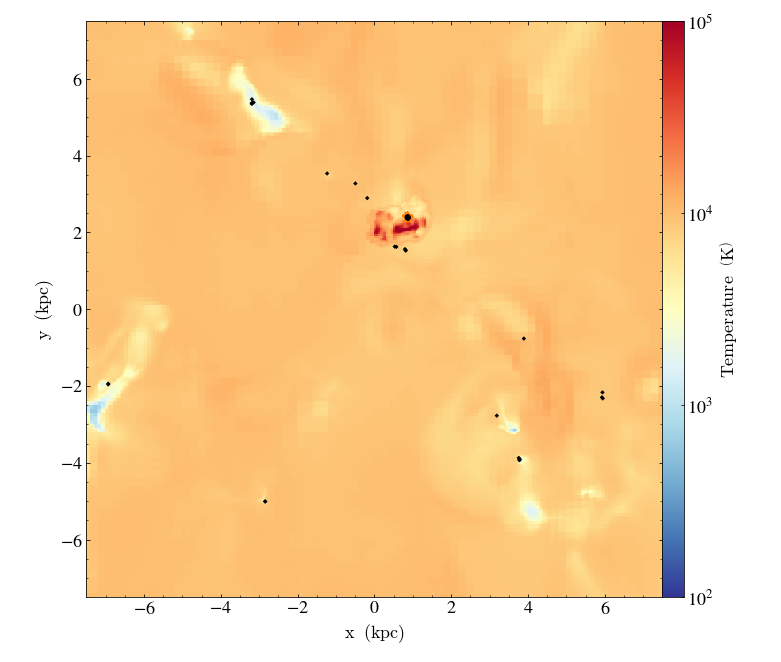
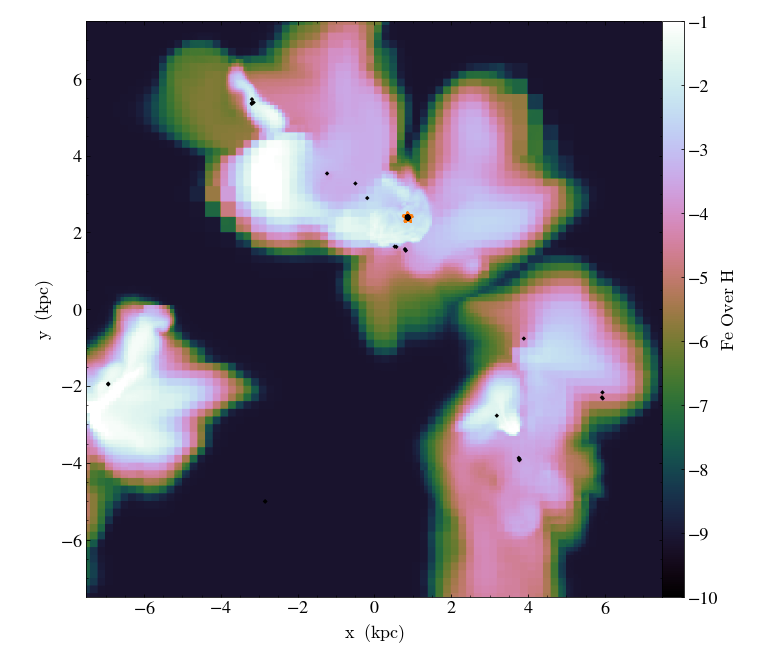
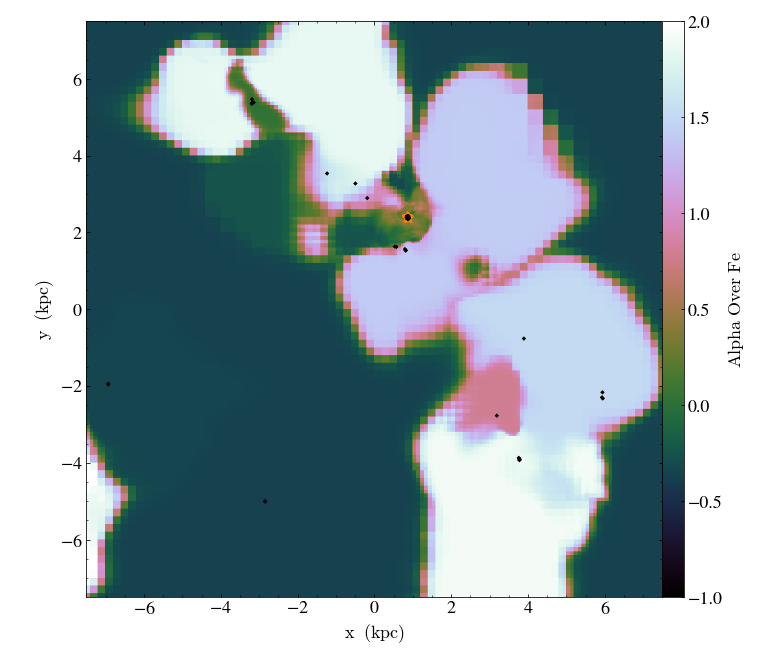
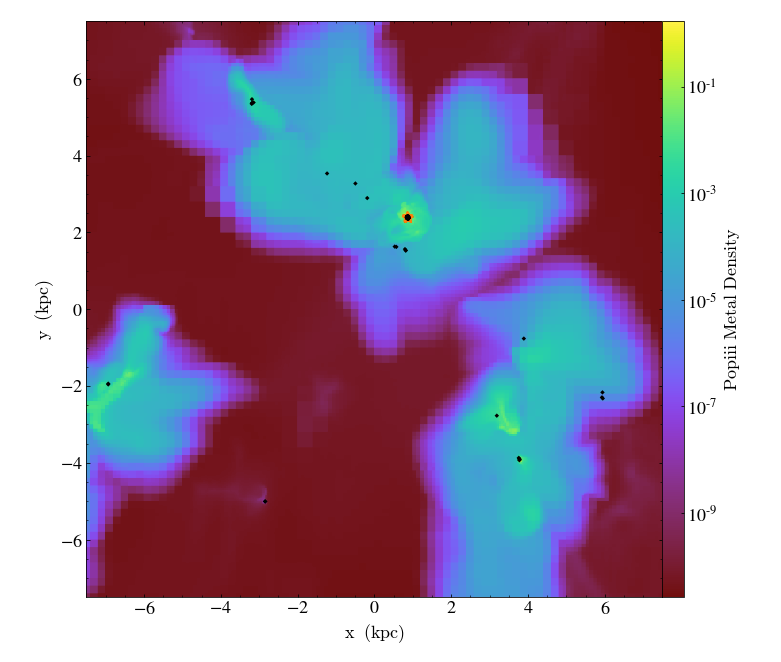
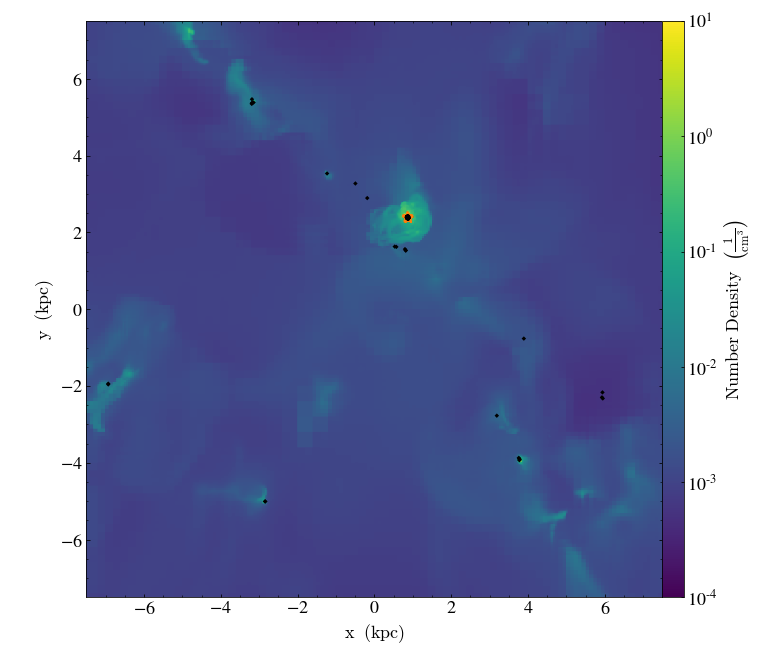

['DD0088_Projection_z_Temperature_metal_density.png',
 'DD0088_Projection_z_Fe_over_H_metal_density.png',
 'DD0088_Projection_z_alpha_over_Fe_metal_density.png',
 'DD0088_Projection_z_PopIII_Metal_Density_metal_density.png',
 'DD0088_Projection_z_number_density_metal_density.png']

In [18]:
l_kpc = 15.0 * yt.units.kpc

ds.domain_width[0].to('kpc') * 0.5 # 10.0*yt.units.kpc
l = (l_kpc / ds.length_unit.to('kpc')).value

box = ds.region( center, center - l, center + l)


all_fields = ['number_density','Temperature','Fe_over_H','alpha_over_Fe',
              #,'FUV_FluxDensity','HI_kph',
              'PopIII_Metal_Density']#,'H2I_kdiss','Ba_over_Fe']

sp = yt.ProjectionPlot(ds, 'z', all_fields, center = center,
                       data_source = box, weight_field = ('gas','metal_density'))
sp.set_width(l_kpc)
sp.annotate_particles(0.95, ptype = 'main_sequence_stars', marker='*', col='C1', p_size=100)
sp.annotate_particles(0.95, ptype = 'main_sequence_popIII_stars', marker='*', col='black', p_size=100)
sp.annotate_particles(0.95, ptype = 'remnant_stars', marker='D', col='black', p_size = 10)
sp.annotate_particles(0.95, ptype = 'low_mass_unresolved_stars', marker='o', col = 'black', p_size=10)



if 'number_density' in sp.fields:
    field = 'number_density'
    sp.set_zlim(field, 1.0E-4, 1.0E1)
    sp.set_cmap(field,'viridis')
    
if 'Temperature' in sp.fields:
    field = 'Temperature'
    sp.set_zlim(field, 100.0, 1.0E5)
    sp.set_cmap(field,'RdYlBu_r')    
    
if 'Fe_over_H' in sp.fields:
    field = 'Fe_over_H'
    sp.set_log(field,False)
    sp.set_zlim(field, -10, -1)
    sp.set_cmap(field,'cubehelix') 
    
if 'alpha_over_Fe' in sp.fields:
    field = 'alpha_over_Fe'
    sp.set_log(field,False)
    sp.set_zlim(field, -1, 2)
    sp.set_cmap(field,'cubehelix') 

        
if 'Ba_over_Fe' in sp.fields:
    field = 'Ba_over_Fe'
    sp.set_log(field,False)
    sp.set_zlim(field, -3, 3)
    sp.set_cmap(field,'cubehelix')

    
sp.show()
sp.set_buff_size(1024)
sp.save()

In [15]:
np.max(data['HI_kph'].to('1/s'))

3.9943893670630954e-11 1/s


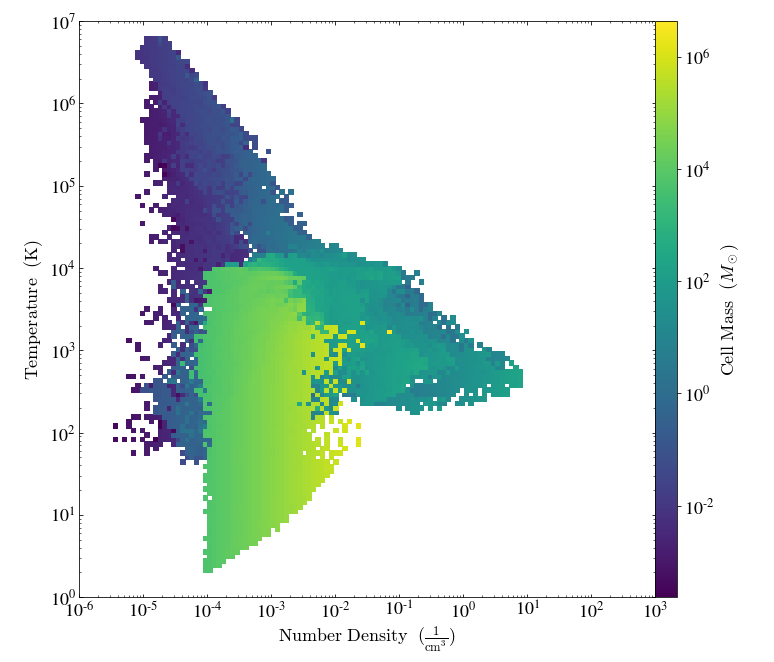

In [81]:
#
#
#
#
#
pp = yt.PhasePlot( ds, 'number_density', 'Temperature','cell_mass')
pp.set_xlim(1.0E-6,1.0E3)
pp.set_ylim(1.0,1.0E7)
pp.set_unit('cell_mass','Msun')
pp.set_cmap('cell_mass','viridis')

pp.show()

42.40710538525811 dimensionless


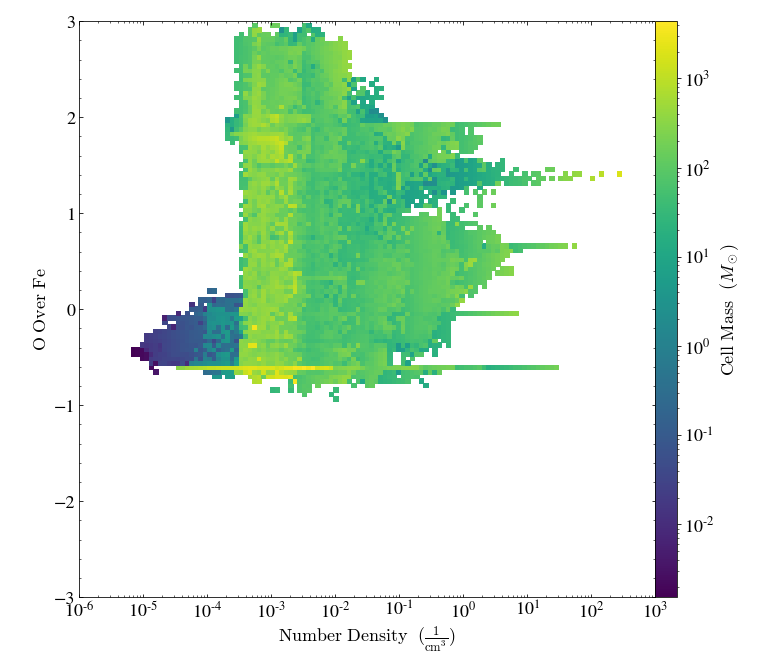

In [22]:
#
#
#
#
#
reg = ds.region(ds.domain_center, ds.domain_center - 20.0*yt.units.kpc, ds.domain_center+20.0*yt.units.kpc)
pp = yt.PhasePlot( reg, 'number_density', 'O_over_Fe','cell_mass')#, ybins
pp.set_log("O_over_Fe",False)
pp.set_ylim(-3,3)

pp.set_xlim(1.0E-6,1.0E3)
pp.set_unit('cell_mass','Msun')
pp.set_cmap('cell_mass','viridis')

pp.show()

In [30]:
#
#
#
#
#
reg = ds.region(ds.domain_center, ds.domain_center - 20.0*yt.units.kpc, ds.domain_center+20.0*yt.units.kpc)
pp = yt.PhasePlot( reg, 'Fe_over_H','O_over_Fe', 'cell_mass')

pp.set_ylim(1,3)
pp.set_log("O_over_Fe",False)    
pp.set_ylim(-3,3)

pp.set_xlim(0.1,1)
pp.set_log("Fe_over_H",False)
pp.set_xlim(-12,1)


pp.set_unit('cell_mass','Msun')
pp.set_cmap('cell_mass','viridis')

pp.show()

YTIllDefinedBounds: The bounds -9.414e+00 and 5.496e-01 are ill-defined. Typically this happens when a log binning is specified and zero or negative values are given for the bounds.

In [28]:
yt.PhasePlot?


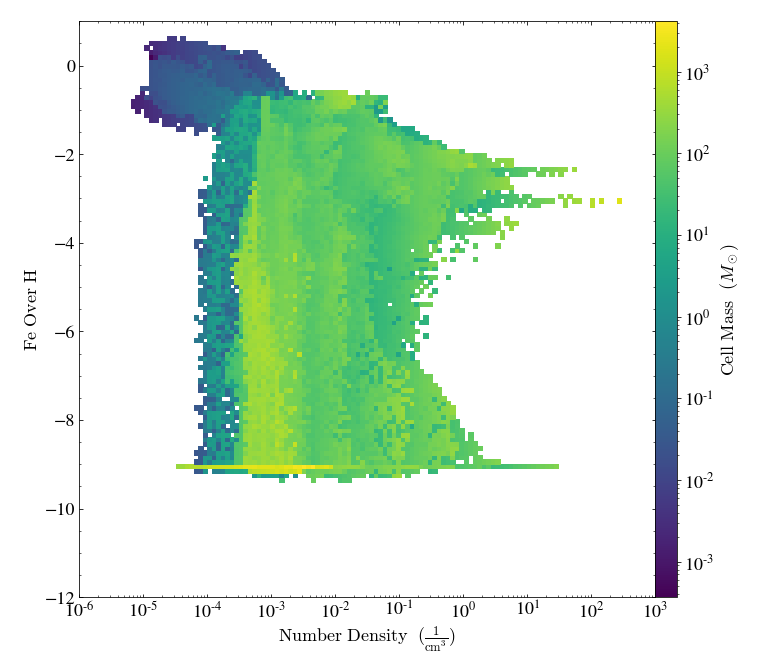

In [19]:
#
#
#
#
#
reg = ds.region(ds.domain_center, ds.domain_center - 20.0*yt.units.kpc, ds.domain_center+20.0*yt.units.kpc)
pp = yt.PhasePlot( reg, 'number_density', 'Fe_over_H','cell_mass')

                  
pp.set_log("Fe_over_H",False)
pp.set_ylim(-12,1)

pp.set_xlim(1.0E-6,1.0E3)
pp.set_unit('cell_mass','Msun')
pp.set_cmap('cell_mass','viridis')

pp.show()

In [28]:
#
#
#

x  =   data[('io','particle_Fe_over_H')]

bins, hist = np.histogram(x, bins = np.arange(-10,1,0.25))

fig, ax = plt.subplots()
fig.set_size_inches(6,6)

plt.step(bins, hist, where = 'post')

YTFieldNotFound: Could not find field '('io', 'particle_Fe_over_H')' in DD0037.

In [ ]:
f= data['PopIII_Metal_Density'] / data['Density'].value
print(np.min(f.value), np.max(f.value), np.sum(f*data['cell_mass']).value/np.sum(data['cell_mass']).value)
f= data['AGB_Metal_Density'] / data['Density'].value
print(np.min(f.value), np.max(f.value), np.sum(f*data['cell_mass']).value/np.sum(data['cell_mass']).value)
f= data['SNII_Metal_Density'] / data['Density'].value
print(np.min(f.value), np.max(f.value), np.sum(f*data['cell_mass']).value/np.sum(data['cell_mass']).value)
f= data['SNIa_Metal_Density'] / data['Density'].value
print(np.min(f.value), np.max(f.value), np.sum(f*data['cell_mass']).value/np.sum(data['cell_mass']).value)

In [88]:
select = data['particle_type']>=11
print(np.sum(data['birth_mass'][select]))

print(np.sum(data['birth_mass'][data['birth_mass']<100]))

15547.292579297628 dimensionless
-88085809382.84601 dimensionless
